In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df=pd.read_csv("ex1data2.txt", sep=",",header=None, names=['x1', 'x2','y'])
df["y"]=df["y"]/1000
df.describe()

,x1,x2,y
count,47.000000,47.000000,47.00000
mean,2000.680851,3.170213,340.41266
std,794.702354,0.760982,125.03990
min,852.000000,1.000000,169.90000
25%,1432.000000,3.000000,249.90000
50%,1888.000000,3.000000,299.90000
75%,2269.000000,4.000000,384.45000
max,4478.000000,5.000000,699.90000


In [27]:
df=df.drop(["x2"],axis=1)    # remove feature x2
df['x3']=1              # adding column of 1
df.head()

,x1,y,x3
0,2104,399.9,1
1,1600,329.9,1
2,2400,369.0,1
3,1416,232.0,1
4,3000,539.9,1


In [28]:
# Normalize the dataset
def normscaler(Z, normal=False, scale='max'): 
    Z = np.reshape(Z, (-1, 1))
    Zn = np.zeros(Z.shape)
    for col in range(Zn.shape[1]):
        std = Z[:,col].std()
        clm = Z[:,col]
        mn = Z[:,col].mean()
        mx = Z[:,col].max()
        nrm = 0
        sclr = 1
        if normal:
            nrm = mn
        if scale =='max':
            sclr = mx
        elif scale == 'std':
            sclr = std
        Zn[:,col] = (clm-nrm)/sclr
        
    return Zn
    
df['x1'] = normscaler(np.array(df['x1']), normal=True, scale='std')
df['y'] = normscaler(np.array(df['y']), normal=True, scale='std')

## Linear Regression

In [29]:
def costfunction(X,y,theta):
    
    h = X.dot(theta)
    j = (h-y)
    J = j.dot(j)/2/(len(X))
    return J

In [30]:
def linear_regression(x,y,alpha,epochs):
    x=np.array(x)
    y=np.array(y)
    m=len(x)
    n=len(x[0])
    loss=[]
    w=np.random.rand(n)
    w0=[]
    w1=[]
    for i in range(epochs):
        loss1=0
        for j in range(m):
            y_pred=np.dot(x[j],w)
            dw=alpha*(y[j]-y_pred)*(x[j])
            w=w+dw
            loss1=loss1+(1/2)*(y[j]-y_pred)**2
            w0.append(w[0])
            w1.append(w[1])
        loss.append(loss1)
    return w,loss,w0,w1


In [31]:
w,loss,w_0,w_1=linear_regression(df[['x1','x3']],df['y'],0.0001,1000)

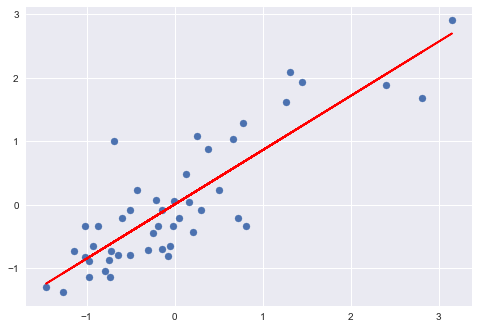

In [32]:
plt.scatter(df['x1'],df['y'])
plt.plot(df['x1'],np.dot(df[['x1','x3']],w),"r")
plt.show()

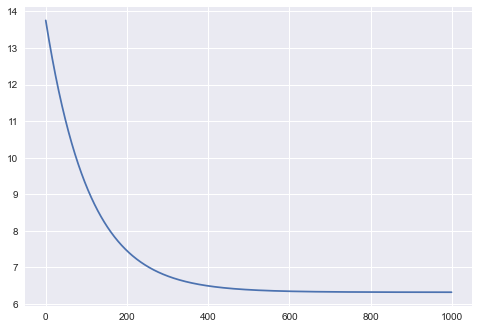

In [33]:
plt.plot(loss)
plt.show()

In [34]:
def function(lr):
    th0 = np.zeros(shape=(len(lr), 47000))
    th1 = np.zeros(shape=(len(lr), 47000))
    j=0

    theta0_vals = np.linspace(-0.5, 1.5, 100)
    theta1_vals = np.linspace(-1, 1, 100)

    J_vals = np.zeros((theta0_vals.size, theta1_vals.size))

    for i in lr:
        w,loss,w_0,w_1=linear_regression(df[['x1','x3']],df['y'],i,1000)

        for t1, element in enumerate(theta0_vals):
            for t2, element2 in enumerate(theta1_vals):
                thetaT = np.zeros(shape=(2, 1))
                thetaT[0][0] = element
                thetaT[1][0] = element2
                J_vals[t1, t2] = costfunction(df[['x1', 'x3']], df['y'], thetaT.flatten())


        th0[j] = w_0
        th1[j] = w_1
        j+=1

    J_vals = J_vals.T

    A, B = np.meshgrid(theta0_vals, theta1_vals)
    C = J_vals

    cp = plt.contourf(A, B, C)
    plt.colorbar(cp)
    for i in range(len(th0)):
        plt.plot(th0[i],th1[i],label="for lr : "+str(lr[i]))
    plt.legend()
    plt.show()

/tmp/ipykernel_192519/2657747969.py:27: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(cp)


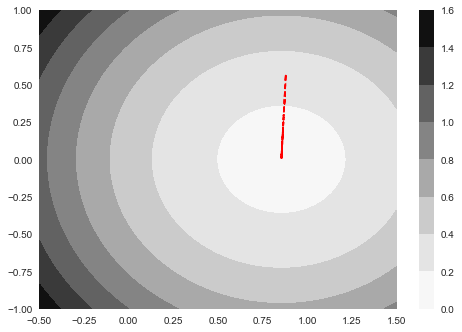

In [35]:
#Grid over which we will calculate J
theta0_vals = np.linspace(-0.5, 1.5, 100)
theta1_vals = np.linspace(-1, 1, 100)

#initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.size, theta1_vals.size))

#Fill out J_vals
for t1, element in enumerate(theta0_vals):
    for t2, element2 in enumerate(theta1_vals):
        thetaT = np.zeros(shape=(2, 1))
        thetaT[0][0] = element
        thetaT[1][0] = element2
        J_vals[t1, t2] = costfunction(df[['x1', 'x3']], df['y'], thetaT.flatten())

#Contour plot
J_vals = J_vals.T

th = np.zeros((len(w_1), 2))
th[:,0] = w_0
th[:,1] = w_1

A, B = np.meshgrid(theta0_vals, theta1_vals)
C = J_vals

cp = plt.contourf(A, B, C)
plt.colorbar(cp)
plt.plot(th.T[0],th.T[1],'r--')
plt.show()


/tmp/ipykernel_192519/1826318609.py:32: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(cp)


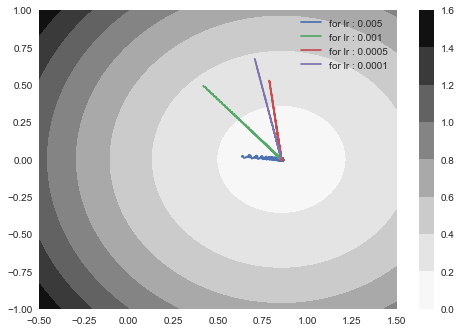

In [36]:
# contour with different learning rates
function([0.005,0.001,0.0005,0.0001])

----------

## Stochastic Gradient Descent

In [37]:
def stochastic_gradient_descent(X, Y,m, alpha, epochs):
    n = len(X)
    X = np.array(X)
    Y = np.array(Y)
    w = np.random.rand(2)
    w0=[]
    w1=[]

    for i in range(epochs):
        arr = np.random.randint(0,n,m)
        for j in arr:
            y_pred = np.dot(X[j], w)
            dw = alpha * (Y[j] - y_pred) * X[j]
            w = w + dw
            w0.append(w[0])
            w1.append(w[1])
            
    return w,w0,w1

In [38]:
w_new,w_00,w_01 = stochastic_gradient_descent(df[['x1', 'x3']],df['y'],7,0.001,1000)

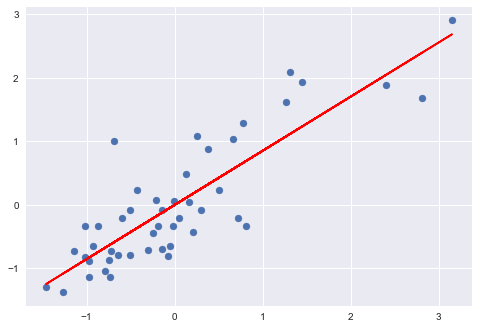

In [39]:
plt.scatter(df['x1'],df['y'])
plt.plot(df['x1'],np.dot(df[['x1','x3']],w_new),"r")
plt.show()

In [40]:
def costfunction(X,y,theta):
    
    h = X.dot(theta)
    j = (h-y)
    J = j.dot(j)/2/(len(X))
    return J

/tmp/ipykernel_192519/2901643553.py:27: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(cp)


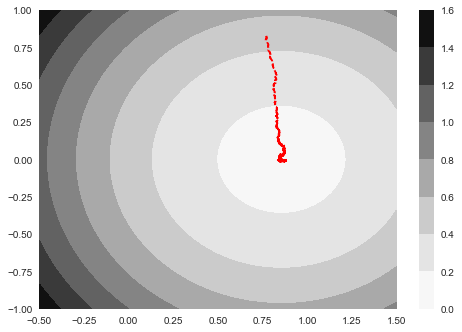

In [41]:
#Grid over which we will calculate J
theta0_vals = np.linspace(-0.5, 1.5, 100)
theta1_vals = np.linspace(-1, 1, 100)

#initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.size, theta1_vals.size))

#Fill out J_vals
for t1, element in enumerate(theta0_vals):
    for t2, element2 in enumerate(theta1_vals):
        thetaT = np.zeros(shape=(2, 1))
        thetaT[0][0] = element
        thetaT[1][0] = element2
        J_vals[t1, t2] = costfunction(df[['x1', 'x3']], df['y'], thetaT.flatten())

#Contour plot
J_vals = J_vals.T

th = np.zeros((len(w_01), 2))
th[:,0] = w_00
th[:,1] = w_01

A, B = np.meshgrid(theta0_vals, theta1_vals)
C = J_vals

cp = plt.contourf(A, B, C)
plt.colorbar(cp)
plt.plot(th.T[0],th.T[1],'r--')
plt.show()

In [42]:
def function(arr):
    th0 = []
    th1 = []
    j=0

    theta0_vals = np.linspace(-0.5, 1.5, 100)
    theta1_vals = np.linspace(-1, 1, 100)

    J_vals = np.zeros((theta0_vals.size, theta1_vals.size))

    for lr, batch_size in arr:
        w,w_0,w_1=stochastic_gradient_descent(df[['x1','x3']],df['y'],batch_size, lr,1000)

        for t1, element in enumerate(theta0_vals):
            for t2, element2 in enumerate(theta1_vals):
                thetaT = np.zeros(shape=(2, 1))
                thetaT[0][0] = element
                thetaT[1][0] = element2
                J_vals[t1, t2] = costfunction(df[['x1', 'x3']], df['y'], thetaT.flatten())


        th0.append(w_0)
        th1.append(w_1)
        j+=1

    J_vals = J_vals.T

    A, B = np.meshgrid(theta0_vals, theta1_vals)
    C = J_vals

    cp = plt.contourf(A, B, C)
    plt.colorbar(cp)
    for i in range(len(th0)):
        plt.plot(th0[i],th1[i],label="for lr : "+str(arr[i][0])+" batch size : "+str(arr[i][1]))
    plt.legend()
    plt.show()

/tmp/ipykernel_192519/814858458.py:32: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(cp)


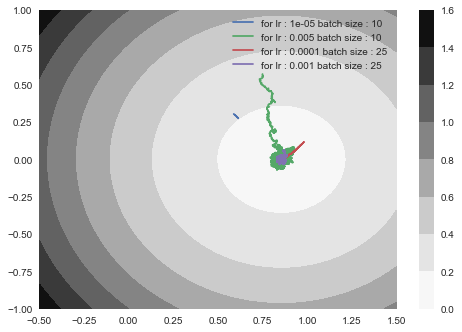

In [43]:
# contour with different learning rates and batch size
function([(0.00001,10),(0.005,10),(0.0001,25),(0.001,25)])

------------

##  Locally weighted linear regression

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
plt.style.use("seaborn")

In [45]:
def get_WeightMatrix_for_LOWES(query_point, Training_examples, Bandwidth):
  
  # M is the No of training examples
  M = Training_examples.shape[0]

  # Initialising W with identity matrix
  W = np.mat(np.eye(M))
  
  # calculating weights for query points
  for i in range(M):
    xi = Training_examples[i]
    denominator = (-2 * Bandwidth * Bandwidth)
    W[i, i] = np.exp(np.dot((xi-query_point), (xi-query_point).T)/denominator)
    return W

In [46]:

# function to make predictions
def predict(training_examples, Y, query_x, Bandwidth):
  M = training_examples.shape[0]
  all_ones = np.ones((M,1))
  training_examples = np.reshape(training_examples, (M,1))
  X_ = np.hstack((training_examples, all_ones))
  qx = np.mat([query_x, 1])
  W = get_WeightMatrix_for_LOWES(qx, X_, Bandwidth)
  Y=Y.reshape(M,1)

  # calculating parameter theta
  theta = np.linalg.pinv(X_.T*(W * X_))*(X_.T*(W * Y))
  
  # calculating predictions
  pred = np.dot(qx, theta)
  return theta, pred

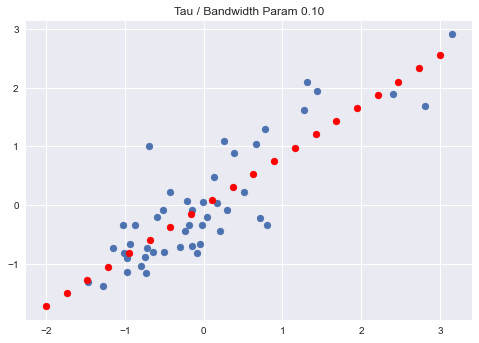

In [47]:
# visualise predicted values with respect to original target values
X = np.array(df['x1'])
Y = np.array(df['y'])


Bandwidth = 0.1
X_test = np.linspace(-2, 3, 20)
Y_test = []
for query in X_test:
  theta, pred = predict(X, Y, query, Bandwidth)
  Y_test.append(pred[0][0])
horizontal_axis = np.array(X)
vertical_axis = np.array(Y)
plt.title("Tau / Bandwidth Param %.2f"% Bandwidth)
plt.scatter(horizontal_axis, vertical_axis)
Y_test = np.array(Y_test)
plt.scatter(X_test, Y_test, color ='red')
plt.show()


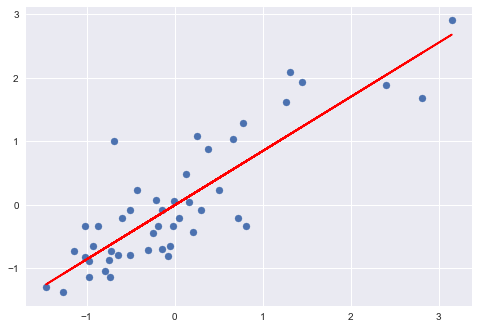

In [48]:
plt.scatter(df['x1'],df['y'])
plt.plot(df['x1'],np.dot(df[['x1', 'x3']],theta),"r")
plt.show()